# Histogram and KDE plot

If we want to see the shape of a data distribution, the histgram can be a good choice

In this section we will see how to plot a histogram using Python and what choices we can make to show the data distribution clearly and accurately

We will also consider some of the limitations of the histogram for small datasets and meet a related plot, the Kernel Density Estimate plot 

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [11]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme() # use pretty defaults

## Example

### Load and inspect the data

<img src= "images/tallVshort.jpg" width=50% alt="A picture of people of different heights"  />

Load the file brotherSisterData.csv which contains heights in cm for 25 brother-sister pairs

In [2]:
heightData = pandas.read_csv('data/brotherSisterData.csv')
display(heightData)

NameError: name 'pandas' is not defined

In this section, we are going to focus just on the brothers.

Let's start by plotting a histogram of the data to see what the distriubtion of heights is.

Text(0, 0.5, 'frequency')

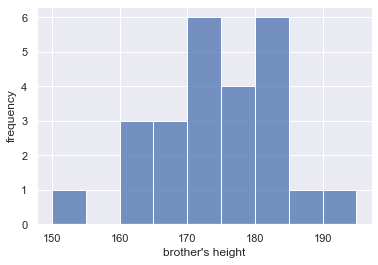

In [14]:
sns.histplot(heightData["brother"],  bins = range(150,200,5), color='b')
plt.xlabel('brother\'s height') 
plt.ylabel('frequency')

### Bin size

I used bins of 5cm to group the heights, and used x-axis values from 150 to 200 cm. 
<ul>
<li>Can you find where in the code this is specified?
<li>Change the width of the bins in the code below to 1cm. 
What do you notice? Can you see the shape of the distribution better or worse using the 1cm bins?
</ul>

Text(0, 0.5, 'frequency')

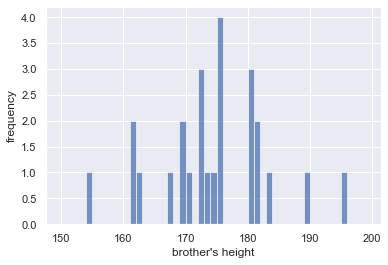

In [15]:
sns.histplot(heightData["brother"],  bins = range(150,200,1), color='b') # hint - the numbers 150, 200 and 5 are the minimum/maximum x axis values and the bin size
plt.xlabel('brother\'s height') 
plt.ylabel('frequency')

### Bin boundaries

One problem with using a histogram when you have only a small number of data points is 
that the shape of the histogram can depend a lot on where the bin boundaries happen to fall. 

Look at the following plot of brothers' heights, again grouped into 5cm bins but with different bin boundaries: 

<ul>
    <li> Aside - what change in the code moved the bin boundaries?
    <li> What were the old in boundaries? What are the new bin boundaries?
</ul>

Text(0, 0.5, 'frequency')

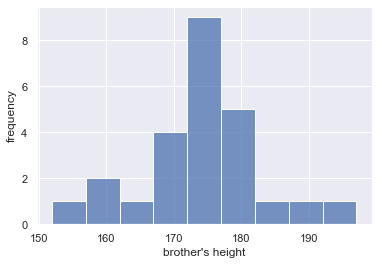

In [16]:
sns.histplot(heightData["brother"],  bins = range(152,202,5), color='b')
plt.xlabel('brother\'s height') 
plt.ylabel('frequency')

The shape of the distribution looks quite different!

We can see this more clearly if we plot both versions next to each other:

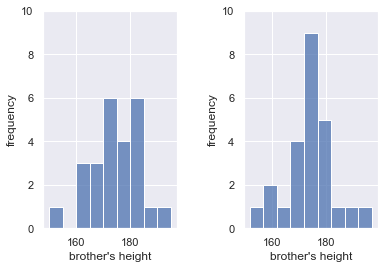

In [22]:
plt.subplot(1,2,1)
sns.histplot(heightData["brother"],  bins = range(150,200,5), color='b')
plt.xlabel('brother\'s height') 
plt.ylabel('frequency')
plt.ylim((0,10)) # this sets the y axis limits rather than letting the computer choose them automatically

plt.subplot(1,2,2)
sns.histplot(heightData["brother"],  bins = range(152,202,5), color='b') 
plt.xlabel('brother\'s height') 
plt.ylabel('frequency')
plt.ylim((0,10))

plt.subplots_adjust(wspace = 0.5) # shift the plots sideways so they don't overlap

Originally (left) the bin boundaries were at 150cm, 155cm, 160cm etc.

In the second histogram (right) the bin boundaries were at 152cm, 157cm, 162cm etc.

Moving the bin boundaries changed how many observations fell in each bin and thus the shape of the histogram. This can happen easily when you have a small number of observations in each bin (check the y-axis in the above histogram - you can see that moving just one observation makes a big difference to the height of the bars).

For this reason, a histogram may not be the best representation of the data for a small sample.

<ul>
    <li> aside - I added a line of code to set the y axis limits to be [0,10] - why do you think I did this?
    <li> Try removing or commenting it out and see how the two histograms change - is it easier to compare with fixed or automatic y-axis?
</ul>

### KDE plot 

Python has a solution to this problem in the form of the KDE (Kernel Density Estimate) plot. 

The KDE plot estimates a smooth distribution shape that fits the underlying observations. 

You can think of it as the average of all the histograms you would get if you tried all the possible sets of bin boundaries.

We can add a kde plot to the histogram by adding an extra <i>argument</i> to the function <tt>sns.histplot</tt>
<ul>
    <li>Can you find the extra argument that adds the KDE plot?
</ul>

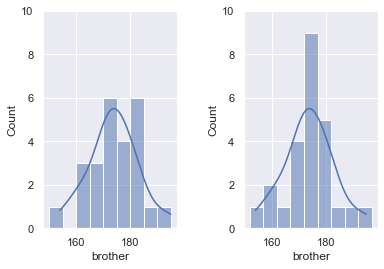

In [18]:
plt.subplot(1,2,1)
sns.histplot(heightData["brother"],  color='b', bins = range(150,200,5), kde="True")
plt.ylim((0,10))

plt.subplot(1,2,2)
sns.histplot(heightData["brother"],  color='b', bins = range(152,202,5), kde="True")
plt.ylim((0,10))

plt.subplots_adjust(wspace = 0.5) # shift the plots sideways so they don't overlap

Note that although the histograms, which have different bin boundaries, look different, the KDE plot always looks the same.

### KDE plot on its own

Arguablby, the histograms are a bit misleading (given that the bin boundaries I happen to choose make such a difference).

I sometimes like to use the KDE plot without a histogram, but to show the individual data points as ticks along the x axis using <tt>sns.rugplot</tt>

<AxesSubplot:xlabel='brother', ylabel='Density'>

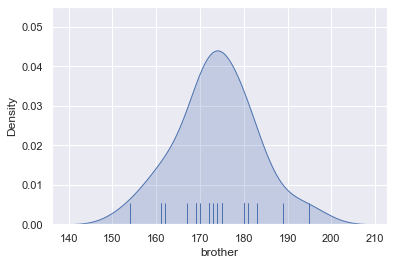

In [19]:
sns.kdeplot(heightData["brother"],  color='b', shade="True") # plot the KDE
sns.rugplot(heightData["brother"],  color='b', height=0.1) # plot individual datapoints as ticks on x axis

I like including the rugplot as it shows the reader how many datapoint the KDE was based on, and where they fell on the x-axis. For example, the KDE shows that the distribution is non-zero for people over 200cm, but the tallest person in our actual sample is 196cm.

#### Probability density

When we plot the KDE as a standalone (rather than over a histogram) the x-axis changes to 'Density' rather than 'count'. 

The values of density are such that the area under the curve of the KDE plot is 1. Technically it is a <i>probability density</i>. It means that probabilities could be read off the graph - so the probability of a member of our sample (one of the brothers) having a height between 160 and 170cm is the same as the area under the curve between 160 and 170cm.


#### Bandwidth

I said you can think of the KDE plot as a kind of average of all the histograms you would get if you tried all the possile locations for bin boundaries (150,155,160, vs 151,156,161 etc)

This is true but it only averages histograms for one possible bin <i>width</i>, which is chosen by the computer to give (generally) a good result.

You saw above that changing the bin width from 5cm to 1cm changed the balance between showing to overall shape of the distribution (where is the main peak) vs the details (details more visible with a small bin boundary).

Try adjusting the code below to draw the KDE plot with a narrower bandwidth (equivalent to narrower bins) and see what happens
<ul>
    <li> The argument <tt>bw_adjust</tt> is a scaling factor for the default bandwidth chosen by the computer.
    <li> If <tt>bw_adjust = 1.0</tt> the default bandwidth is used
    <li> If <tt>bw_adjust = 0.5</tt>, a narrower bandwith of half the default is used
    <li> If <tt>bw_adjust = 2.0</tt>, a wider bandwith of twice the default is used
</ul>
Try out some different values for <tt>bw_adjust</tt> to get a more detailed, or a smoother, KDE - you could try 1.0, 2.0, 0.5 and 0.1

<AxesSubplot:xlabel='brother', ylabel='Density'>

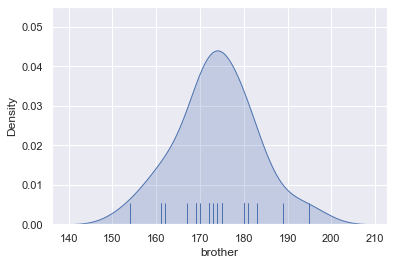

In [20]:
sns.kdeplot(heightData["brother"],  color='b', shade="True", bw_adjust=1.0) # plot the KDE
sns.rugplot(heightData["brother"],  color='b', height=0.1) # plot individual datapoints as ticks on x axis